Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
diabetes_train |> glimpse()

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 4, 1, 3, 1, 13, 5, 5, 6, 10, 4, 11,…
$ Glucose                  <dbl> 85, 116, 115, 110, 103, 126, 97, 145, 117, 10…
$ BloodPressure            <dbl> 66, 74, 0, 92, 30, 88, 66, 82, 92, 75, 92, 78…
$ SkinThickness            <dbl> 29, 0, 0, 0, 38, 41, 15, 19, 0, 26, 0, 31, 33…
$ Insulin                  <dbl> 0, 0, 0, 0, 83, 235, 140, 110, 0, 0, 0, 0, 19…
$ BMI                      <dbl> 26.6, 25.6, 35.3, 37.6, 43.3, 39.3, 23.2, 22.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.201, 0.134, 0.191, 0.183, 0.704, 0.4…
$ Age                      <dbl> 31, 30, 29, 30, 33, 27, 22, 57, 38, 60, 28, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

Whether or not the patient has diabetes is considered the outcome variable in this dataset. It is modeled as a 0 or 1 and shown in the column 'Outcome'.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |     Plasma glucose concentration a 2 hours in an oral glucose tolerance test        |
| BMI         |     Body mass index (weight in kg/(height in m)^2)        |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

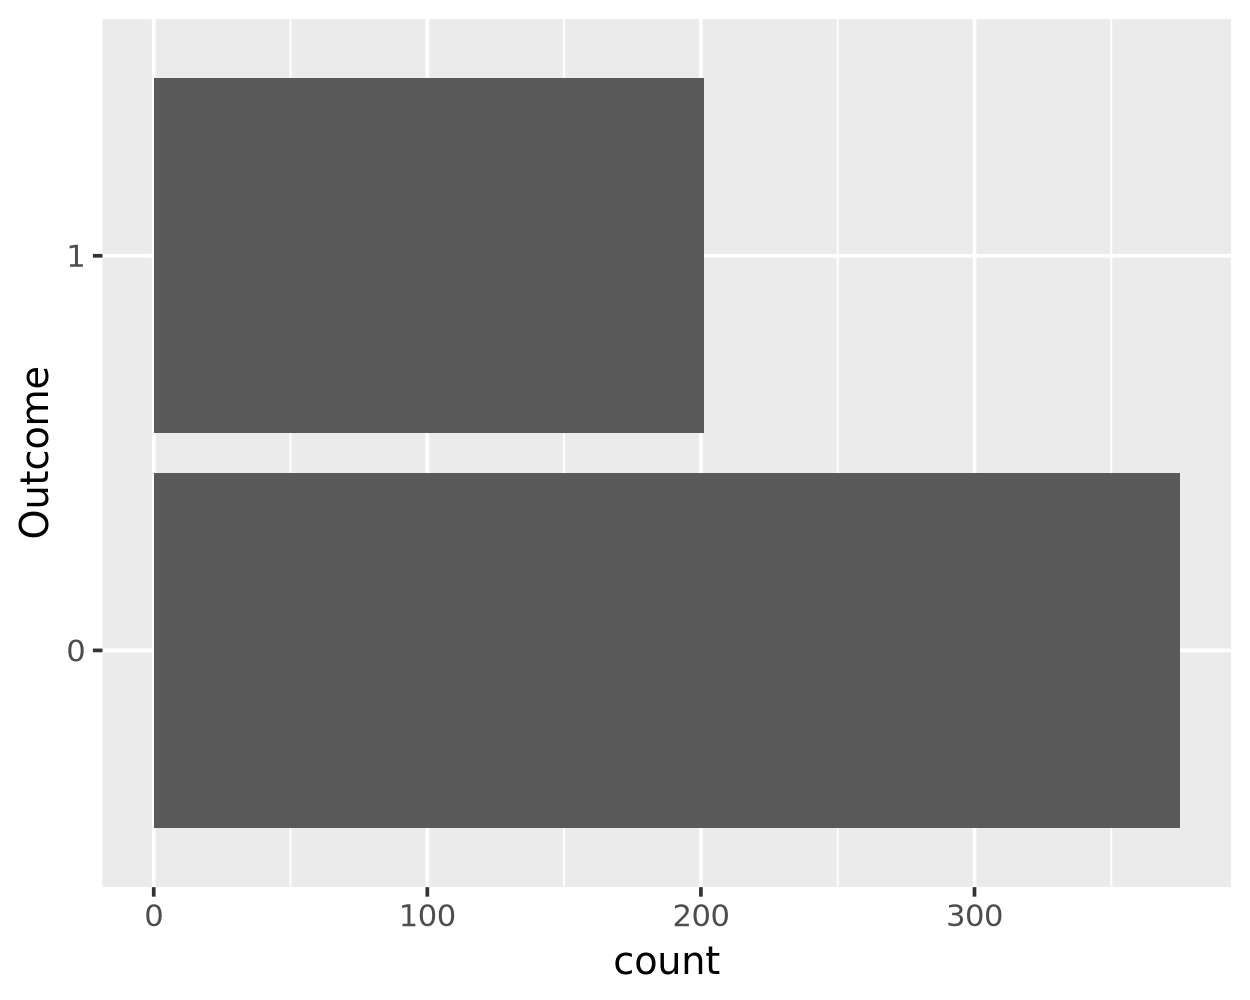

In [23]:
ggplot(diabetes_train, aes(y = Outcome)) + geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

We do not have equal counts of each outcome and therefore, the data is not balanced. 



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

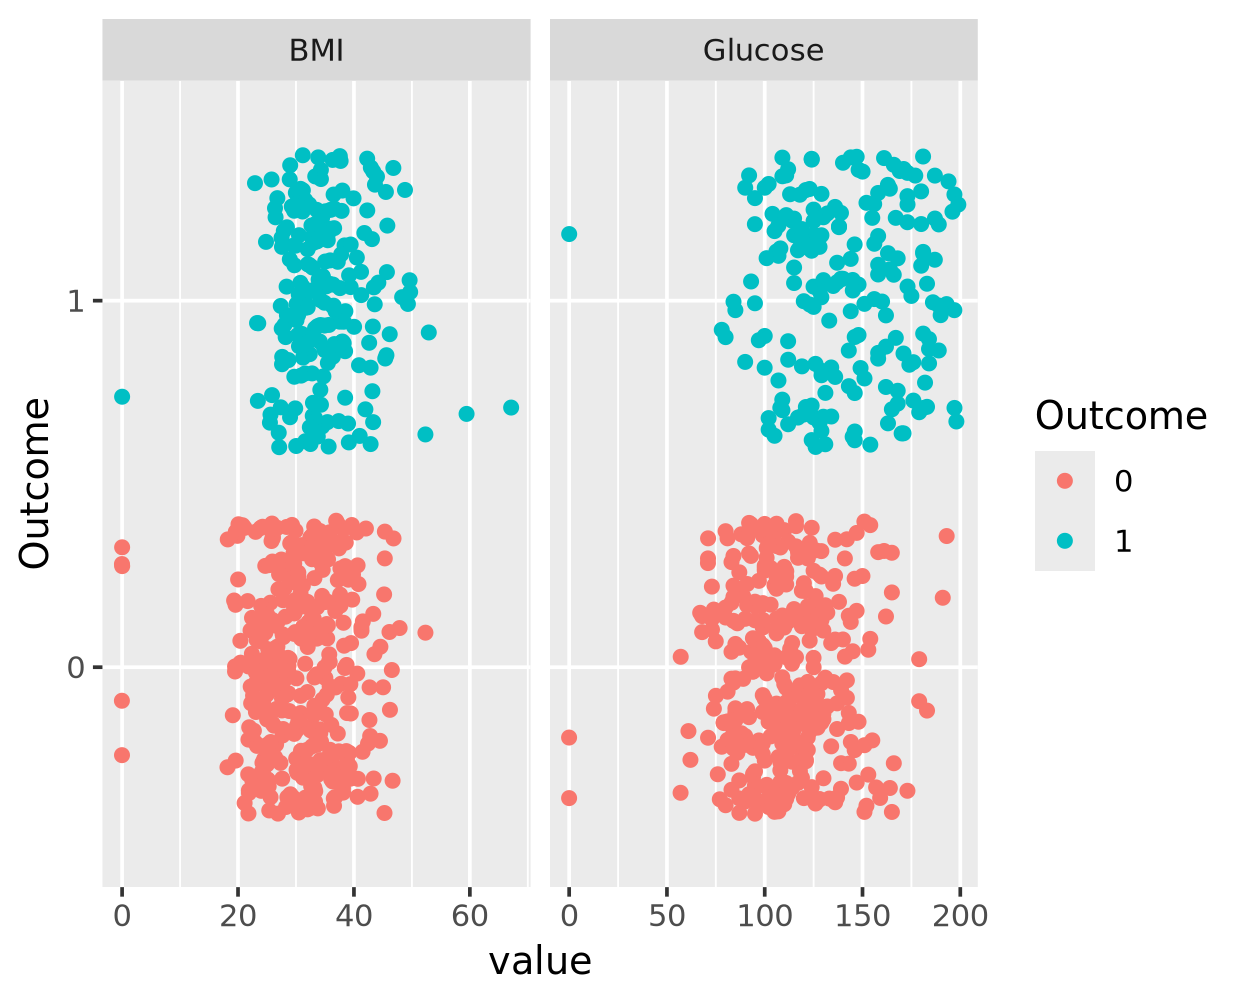

In [25]:
ggplot(plot_df, aes(x = value, y = Outcome, color = Outcome)) +
    geom_jitter() + 
    facet_wrap(~name, ncol = 2, scales = 'free_x')



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

When scales = 'free_x' is removed, the plot's scaling is not adjusted based on each of the sets of data points, making the data points, specifically for BMI, difficult to read. 

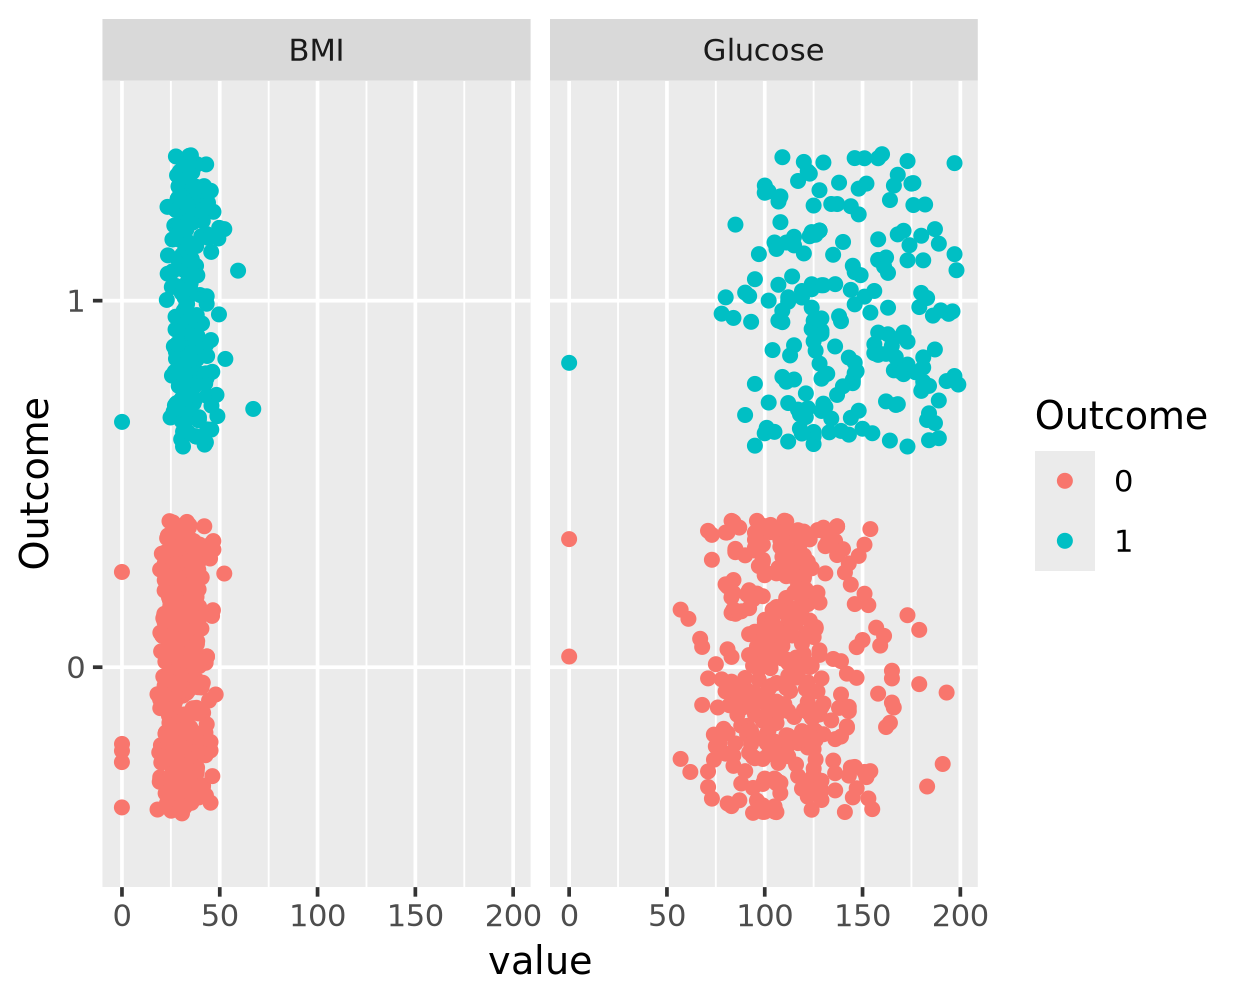

In [21]:
ggplot(plot_df, aes(x = value, y = Outcome, color = Outcome)) +
    geom_jitter() + 
    facet_wrap(~name, ncol = 2)


Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [16]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)
tidy(mod_fit)


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.49657143,0.702431829,-10.672312,1.371706e-26
BMI,0.06842283,0.015438954,4.431831,9.343644e-06
Glucose,0.03701863,0.003923493,9.435123,3.905370e-21


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [18]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)
diabetes_test_wPred |> head()


.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.90714234,0.09285766,1,89,66,23,94,28.1,0.167,21,0
0,0.62168887,0.37831113,10,139,80,0,0,27.1,1.441,57,0
0,0.70516143,0.29483857,1,115,70,30,96,34.6,0.529,32,1
0,0.80369632,0.19630368,8,99,84,0,0,35.4,0.388,50,0
1,0.07710771,0.92289229,7,196,90,0,0,39.8,0.451,41,1
1,0.34501441,0.65498559,7,147,76,0,0,39.4,0.257,43,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [19]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 109  31
         1  16  36

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data? 
- Of those that actually had diabetes, how many were predicted to have diabetes by your model? 
- How many individuals predicted to have diabetes did not have diabetes? 

**Answer:**
- How many individuals had diabetes in your test data? 67 
- Of those that actually had diabetes, how many were predicted to have diabetes by your model? 36
- How many individuals predicted to have diabetes did not have diabetes? 16